<a href="https://colab.research.google.com/github/thaisgarcia/music-analysis/blob/main/AnalisePlaylistSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de uma Playlist de Rock do Spotify
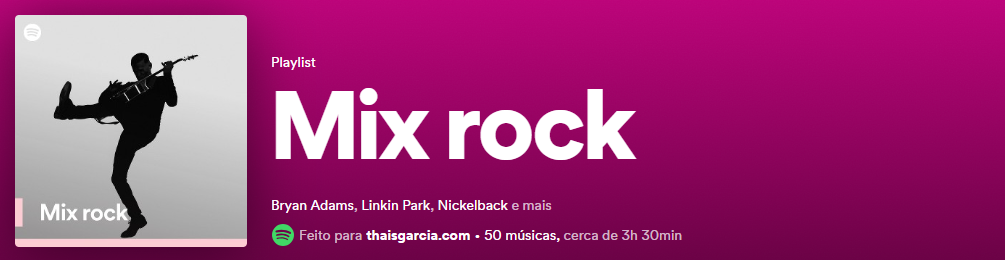

In [1]:
!pip install spotipy
!pip install wordcloud

BIBLIOTECAS

üêº Pandas: manipula√ß√£o do dataset

üìä MatPlotLib + Seaborn: an√°lise gr√°fica

üßÆ Numpy: c√°lculos e manipula√ß√£o de arrays

üìê Scipy: para normaliza√ß√£o de dados

üé∂ Spotipy: para consumirmos a API do Spotify e obtermos dados da playlist

üóìÔ∏è Datetime: manipular datas

üí¨ Wordcloud: an√°lise de palavras mais frequentes

In [2]:
import spotipy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm, skew
from wordcloud import WordCloud

In [3]:
spotify_details = {
    'client_id' : 'seu_client_id',
    'client_secret':'seu_client_secret',
    'redirect_uri':'https://beacons.ai/thaisgarcia11'}

try:
  sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'],
          client_secret=spotify_details['client_secret'],
          redirect_uri=spotify_details['redirect_uri'], open_browser=False))
except:
  print('Token is not accesible')

Importando dados da Playlist:

In [4]:
rock_playlist = sp.playlist_tracks('https://open.spotify.com/playlist/37i9dQZF1EQpj7X7UK8OOF')

tracks = rock_playlist['items']
while rock_playlist['next']:
        rock_playlist = sp.next(rock_playlist)
        tracks.extend(rock_playlist['items'])

In [5]:
audio_features = []

# criando novo arquivo CSV e cabe√ßalho
with open('musicas.csv', mode = 'w') as csvfile:
  csv.writer(csvfile, delimiter=',').writerow([
        'Nome da m√∫sica',
        'Nome do artista',
        '√Ålbum',
        'Data de lan√ßamento do √°lbum',
        'Qtd m√∫sicas no √°lbum',
        'Dura√ß√£o em min',
        'Conte√∫do expl√≠cito',
        'Preview da m√∫sica',
        'Energia',
        'Ao vivo',
        'Ac√∫stica',
        'Instrumental',
        'Dan√ßabilidade',
        'Volume',
  ])

  for musicas in tracks:

    audio_features = sp.audio_features(musicas['track']['id'])

    # obter informa√ß√µes detalhadas de √°udio da m√∫sica
    nomes_artistas = str({artista['name'] for artista in musicas['track']['artists']})
    energia = str({audio['energy'] for audio in audio_features})
    vivacidade = str({audio['liveness'] for audio in audio_features})
    acustica = str({audio['acousticness'] for audio in audio_features})
    instrumental = str({audio['instrumentalness'] for audio in audio_features})
    danca = str({audio['danceability'] for audio in audio_features})
    volume = str({audio['loudness'] for audio in audio_features})

    # remover caracteres especiais
    caracteres = '{"}'
    for i in range(0,len(caracteres)):
      nomes_artistas = nomes_artistas.replace(caracteres[i],"")
      energia = energia.replace(caracteres[i],"")
      vivacidade = vivacidade.replace(caracteres[i],"")
      acustica = acustica.replace(caracteres[i],"")
      instrumental = instrumental.replace(caracteres[i],"")
      danca = danca.replace(caracteres[i],"")
      volume = volume.replace(caracteres[i],"")

    # escrever dados no csv
    csv.writer(csvfile, delimiter=',').writerow([
            musicas['track']['name'],
            nomes_artistas,
            musicas['track']['album']['name'],
            musicas['track']['album']['release_date'],
            musicas['track']['album']['total_tracks'],
            musicas['track']['duration_ms'] / 60000,
            musicas['track']['explicit'],
            musicas['track']['preview_url'],
            energia,
            vivacidade,
            acustica,
            instrumental,
            danca,
            volume
    ])

    musicas['track']['album']['release_date']

In [6]:
df = pd.read_csv('musicas.csv')
print('N√∫mero de m√∫sicas:', len(df.index))
df.head()

N√∫mero de m√∫sicas: 50


Nome da m√∫sica          Nome do artista  \
0                     Heaven            'Bryan Adams'   
1            CASTLE OF GLASS            'Linkin Park'   
2  What Are You Waiting For?             'Nickelback'   
3                  Centuries           'Fall Out Boy'   
4              Snow (Hey Oh)  'Red Hot Chili Peppers'   

                                          √Ålbum Data de lan√ßamento do √°lbum  \
0  Reckless (30th Anniversary / Deluxe Edition)                  1984-11-05   
1                                 LIVING THINGS                  2012-06-20   
2                              No Fixed Address                  2014-11-17   
3               American Beauty/American Psycho                  2015-01-20   
4                              Stadium Arcadium                  2006-05-09   

   Qtd m√∫sicas no √°lbum  Dura√ß√£o em min  Conte√∫do expl√≠cito  \
0                    32        4.056000               False   
1                    12        3.423333               False   
2                    11        3.648433               False   
3                    11        3.806000               False   
4                    29        5.577767               False   

                                   Preview da m√∫sica  Energia  Ao vivo  \
0  https://p.scdn.co/mp3-preview/a02f96375ee67e1e...    0.589   0.1220   
1  https://p.scdn.co/mp3-preview/4a1db9ba57b75cd3...    0.911   0.0908   
2  https://p.scdn.co/mp3-preview/a3bd3e783def4293...    0.826   0.2790   
3  https://p.scdn.co/mp3-preview/d6fcac6047be8c06...    0.858   0.1020   
4  https://p.scdn.co/mp3-preview/d1e419a7f2aa9ba7...    0.900   0.1190   

   Ac√∫stica  Instrumental  Dan√ßabilidade  Volume  
0   0.04650      0.000000          0.382  -7.315  
1   0.06860      0.001880          0.615  -3.584  
2   0.03130      0.000000          0.505  -8.106  
3   0.00359      0.000000          0.393  -2.868  
4   0.11600      0.000017          0.427  -3.674

Verificando dados ausentes:

In [7]:
df_ausentes = df.isnull().sum()
df_ausentes

Nome da m√∫sica                 0
Nome do artista                0
√Ålbum                          0
Data de lan√ßamento do √°lbum    0
Qtd m√∫sicas no √°lbum           0
Dura√ß√£o em min                 0
Conte√∫do expl√≠cito             0
Preview da m√∫sica              0
Energia                        0
Ao vivo                        0
Ac√∫stica                       0
Instrumental                   0
Dan√ßabilidade                  0
Volume                         0
dtype: int64

An√°lise das features num√©ricas:

In [8]:
numericas = df.select_dtypes(include = [np.number])
numericas.columns

Index(['Qtd m√∫sicas no √°lbum', 'Dura√ß√£o em min', 'Energia', 'Ao vivo',
       'Ac√∫stica', 'Instrumental', 'Dan√ßabilidade', 'Volume'],
      dtype='object')

Rela√ß√£o de **Energia** com **Dan√ßabilidade**:

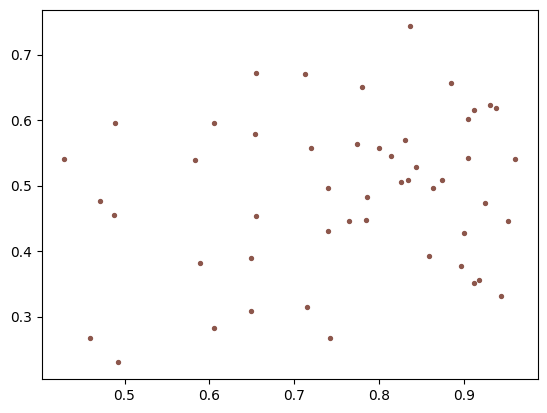

In [9]:
plt.scatter(df['Energia'], df['Dan√ßabilidade'], 8, color = "C5" )
plt.show()

Rela√ß√£o de **Energia** com **Volume**:

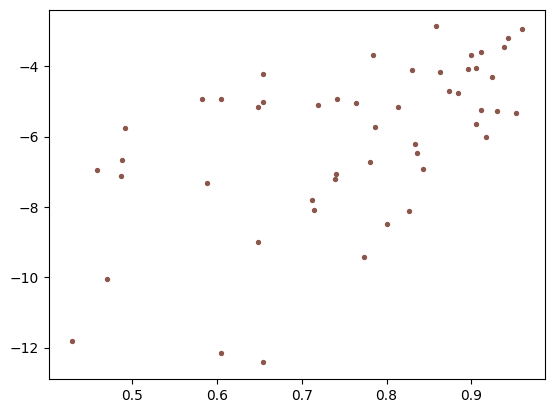

In [10]:
plt.scatter(df['Energia'], df['Volume'], 8, color = "C5" )
plt.show()

Rela√ß√£o do **Volume** com **Ac√∫stica**:

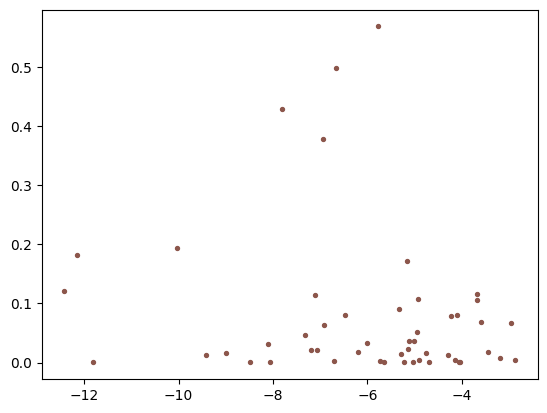

In [11]:
plt.scatter(df['Volume'], df['Ac√∫stica'], 8, color = "C5" )
plt.show()

Analisando qual √© a banda com a m√∫sica mais curta da playlist e tamb√©m com a m√∫sica mais longa:

In [12]:
print(df['Nome do artista'][df['Dura√ß√£o em min'] == df['Dura√ß√£o em min'].min()])
print(df['Nome do artista'][df['Dura√ß√£o em min'] == df['Dura√ß√£o em min'].max()])

29    'Queen'
Name: Nome do artista, dtype: object
40    'Scorpions'
Name: Nome do artista, dtype: object


Palavras que mais aparecem no t√≠tulo das m√∫sicas:

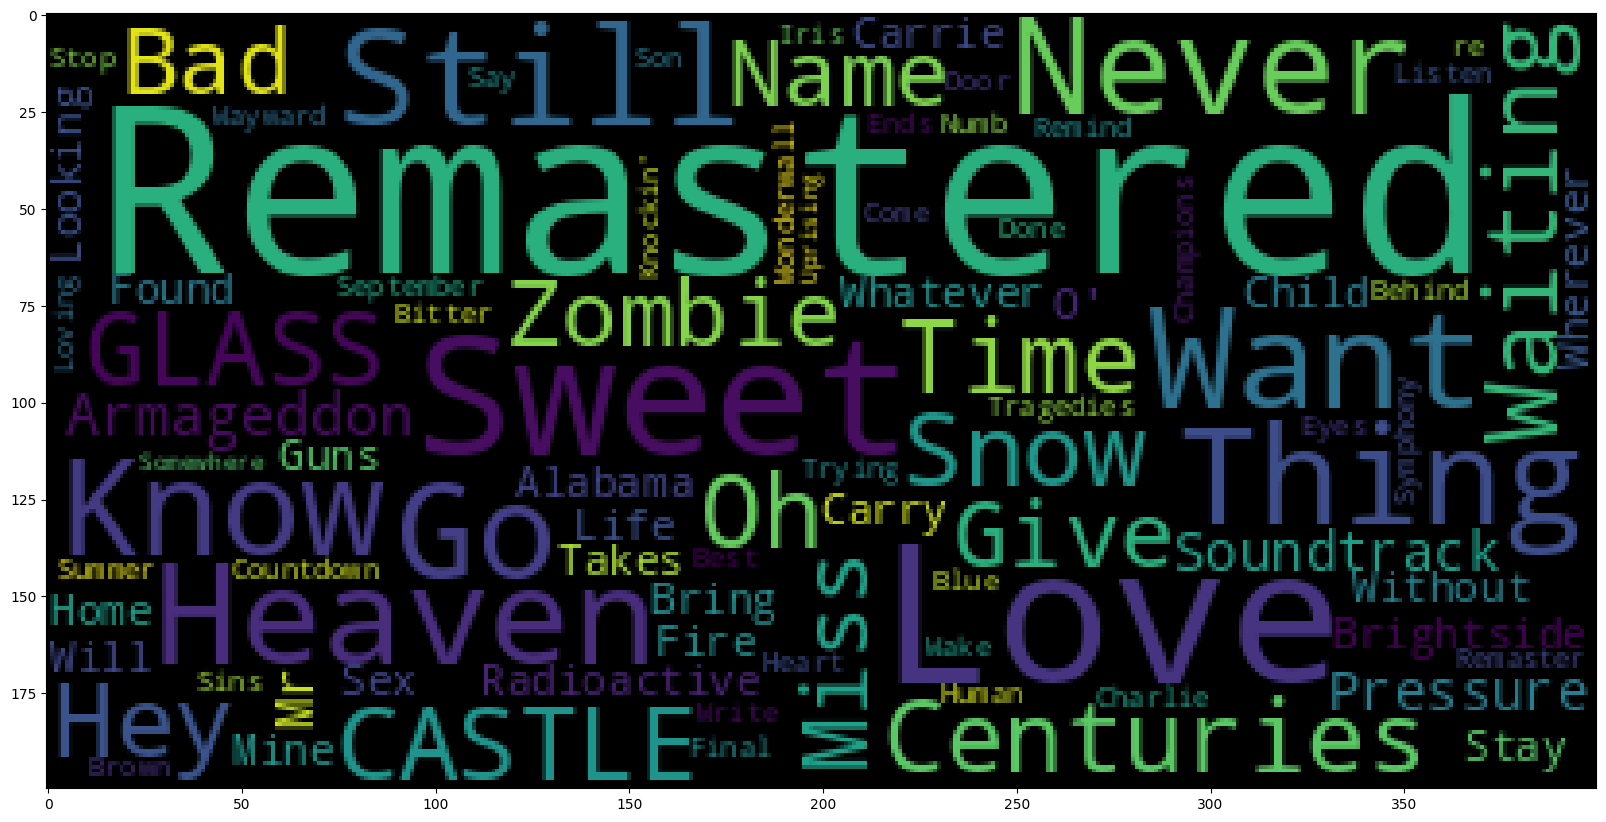

In [13]:
lista = df['Nome da m√∫sica'].tolist()
paragrafo = " ".join(lista)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo))

Presen√ßa de conte√∫do expl√≠cito nas m√∫sicas:

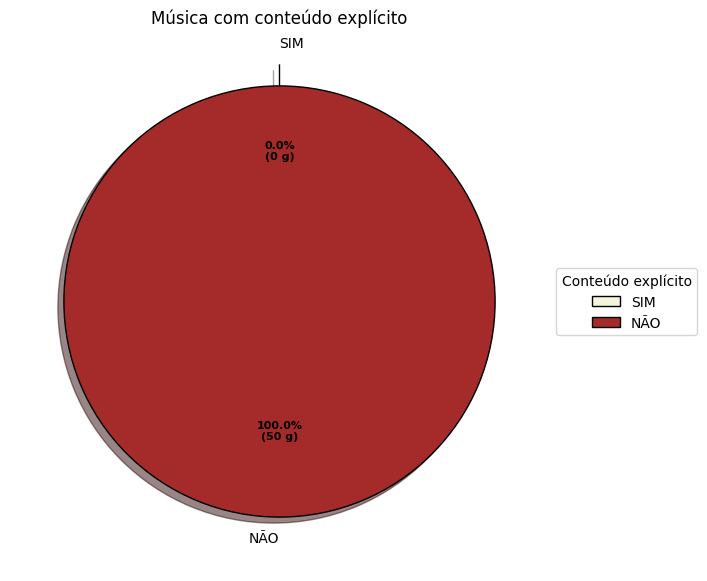

In [14]:
# dados
legenda = ['SIM', 'N√ÉO']
data = [(df['Conte√∫do expl√≠cito'] == True).sum(), (df['Conte√∫do expl√≠cito'] == False).sum()]

# costumiza√ß√£o do gr√°fico de pizza
explode = (0.1, 0.0)
colors = ("beige", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = legenda,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, legenda,
          title ="Conte√∫do expl√≠cito",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("M√∫sica com conte√∫do expl√≠cito")

plt.show()

Distribui√ß√£o do tempo de dura√ß√£o das m√∫sicas:


<ipython-input-15-be248b276563>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dura√ß√£o em min'], fit=norm)


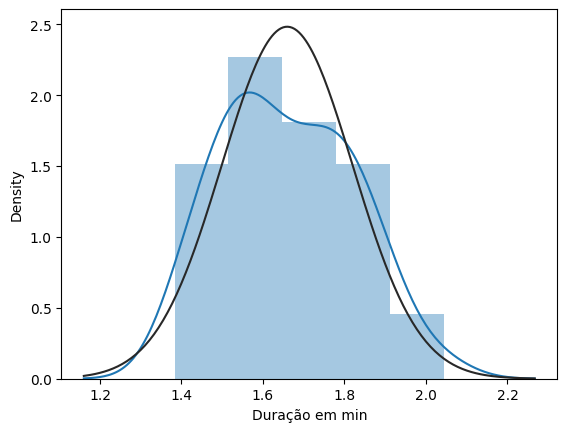

In [15]:
df['Dura√ß√£o em min'] = np.log1p(df['Dura√ß√£o em min'])
sns.distplot(df['Dura√ß√£o em min'], fit=norm)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nome da m√∫sica               50 non-null     object 
 1   Nome do artista              50 non-null     object 
 2   √Ålbum                        50 non-null     object 
 3   Data de lan√ßamento do √°lbum  50 non-null     object 
 4   Qtd m√∫sicas no √°lbum         50 non-null     int64  
 5   Dura√ß√£o em min               50 non-null     float64
 6   Conte√∫do expl√≠cito           50 non-null     bool   
 7   Preview da m√∫sica            50 non-null     object 
 8   Energia                      50 non-null     float64
 9   Ao vivo                      50 non-null     float64
 10  Ac√∫stica                     50 non-null     float64
 11  Instrumental                 50 non-null     float64
 12  Dan√ßabilidade                50 non-null     float64
 13  Volume   

In [17]:
df['Data de lan√ßamento do √°lbum'] = pd.to_datetime(df['Data de lan√ßamento do √°lbum'])

Descobrindo quais m√∫sicas s√£o da d√©cada de 70:

In [18]:
decada70 = df[df['Data de lan√ßamento do √°lbum'].between('1970-01-01', '1980-01-01')]
print(decada70['Nome da m√∫sica'])

12                        Sweet Home Alabama
23                      Carry on Wayward Son
29    We Are The Champions - Remastered 2011
Name: Nome da m√∫sica, dtype: object


Descobrindo quais m√∫sicas s√£o da d√©cada de 80:

In [19]:
decada80 = df[df['Data de lan√ßamento do √°lbum'].between('1980-01-01', '1990-01-01')]
print(decada80['Nome da m√∫sica'])

0                                          Heaven
7                        You Give Love A Bad Name
9                Under Pressure - Remastered 2011
14                            With Or Without You
15                            Sweet Child O' Mine
16      Should I Stay or Should I Go - Remastered
21     I Still Haven't Found What I'm Looking For
22                                         Carrie
28                            The Final Countdown
33                                  Summer Of '69
35                           Listen To Your Heart
38    I Want to Know What Love Is - 1999 Remaster
45                                      Your Love
Name: Nome da m√∫sica, dtype: object


Descobrindo quais m√∫sicas s√£o da d√©cada de 90:

In [20]:
decada90 = df[df['Data de lan√ßamento do √°lbum'].between('1990-01-01', '2000-01-01')]
print(decada90['Nome da m√∫sica'])

6                                                Zombie
8     I Don't Want To Miss A Thing - From "Armageddo...
31              Bitter Sweet Symphony - Remastered 2016
32                         Come As You Are - Remastered
43                                                 Iris
44                            Knockin' On Heaven's Door
47                              Wonderwall - Remastered
Name: Nome da m√∫sica, dtype: object


Quantidade de m√∫sicas de cada d√©cada:

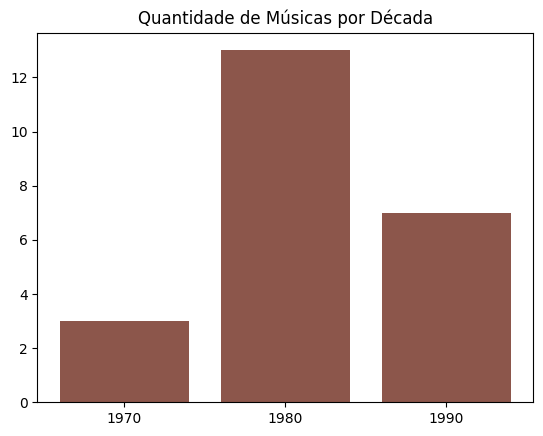

In [21]:
quant70 = (decada70['Nome da m√∫sica']).count()
quant80 = (decada80['Nome da m√∫sica']).count()
quant90 = (decada90['Nome da m√∫sica']).count()

quantidade = [quant70, quant80, quant90]
decadas = ['1970', '1980', '1990']

plt.bar(decadas, quantidade, color = "C5" )
plt.title("Quantidade de M√∫sicas por D√©cada")
plt.show()